In [120]:
# !pip install spotipy 
# !pip install lyricsgenius

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import config
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import os 
import re
from lyricsgenius import Genius
import json

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(config.spotify['client_id'],
                                                                        config.spotify['client_secret']))

In [238]:
url = 'https://open.spotify.com/album/43otFXrY0bgaq5fB3GrZj6?si=_GGcUScGTK-P2LsvPnk2yQ&dl_branch=1'
uri = 'spotify:album:43otFXrY0bgaq5fB3GrZj6'

In [4]:
def get_album_songs(uri_info):
    uri = []
    track = []
    duration = []
    explicit = []
    track_number = []
    one = sp.album_tracks(uri_info, limit=50, offset=0, market='US')
    df1 = pd.DataFrame(one)
    
    for i, x in df1['items'].items():
        uri.append(x['uri'])
        track.append(x['name'])
        duration.append(x['duration_ms'])
        explicit.append(x['explicit'])
        track_number.append(x['track_number'])
    
    df2 = pd.DataFrame({
    'uri':uri,
    'track':track,
    'duration_ms':duration,
    'explicit':explicit,
    'track_number':track_number})
    
    return df2

In [239]:
album = get_album_songs(uri)
album

,uri,track,duration_ms,explicit,track_number
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10


In [6]:
def get_track_info(df):
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    
    for i in df['uri']:
        for x in sp.audio_features(tracks=[i]):
            danceability.append(x['danceability'])
            energy.append(x['energy'])
            key.append(x['key'])
            loudness.append(x['loudness'])
            speechiness.append(x['speechiness'])
            acousticness.append(x['acousticness'])
            instrumentalness.append(x['instrumentalness'])
            liveness.append(x['liveness'])
            valence.append(x['valence'])
            tempo.append(x['tempo'])
            
    df2 = pd.DataFrame({
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'tempo':tempo})
    
    return df2

In [240]:
song_info = get_track_info(album)
song_info

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999
1,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959
2,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038
3,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158
4,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597
5,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974
6,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010
7,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041
8,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738
9,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843


In [241]:
the_getaway = album.merge(song_info, left_index=True, right_index=True)
the_getaway

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843


chose this album because was ranked #1 in 2016 

In [242]:
def popularity(df):
    empty = []
    for i in df['uri']:
            series_track = pd.Series(sp.track(i))
            empty.append(series_track)
    df2 = pd.DataFrame(empty)
    return df2

In [243]:
pop = popularity(the_getaway)
pop

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,250386,False,{'isrc': 'USWB11600617'},{'spotify': 'https://open.spotify.com/track/3b...,https://api.spotify.com/v1/tracks/3bIQIx7hveYP...,3bIQIx7hveYPQDdhjZ1kcq,False,The Getaway,60,https://p.scdn.co/mp3-preview/72fb1fa491d3aed9...,1,track,spotify:track:3bIQIx7hveYPQDdhjZ1kcq
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,302000,False,{'isrc': 'USWB11600478'},{'spotify': 'https://open.spotify.com/track/2o...,https://api.spotify.com/v1/tracks/2oaK4JLVnmRG...,2oaK4JLVnmRGIO9ytBE1bt,False,Dark Necessities,72,https://p.scdn.co/mp3-preview/603321bf69cb0fd2...,2,track,spotify:track:2oaK4JLVnmRGIO9ytBE1bt
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,200466,False,{'isrc': 'USWB11600618'},{'spotify': 'https://open.spotify.com/track/0c...,https://api.spotify.com/v1/tracks/0cv2LgkvEoQi...,0cv2LgkvEoQiGgFWcZaAMA,False,We Turn Red,51,https://p.scdn.co/mp3-preview/7401884887b72bf4...,3,track,spotify:track:0cv2LgkvEoQiGgFWcZaAMA
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,211520,False,{'isrc': 'USWB11600619'},{'spotify': 'https://open.spotify.com/track/0p...,https://api.spotify.com/v1/tracks/0pjCkLjbgSLn...,0pjCkLjbgSLn5c0Ilwuv8z,False,The Longest Wave,59,https://p.scdn.co/mp3-preview/0800193b0d8994cf...,4,track,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,268733,False,{'isrc': 'USWB11600620'},{'spotify': 'https://open.spotify.com/track/2X...,https://api.spotify.com/v1/tracks/2XTkpF9T2PKv...,2XTkpF9T2PKvcLgamGJGx1,False,Goodbye Angels,62,https://p.scdn.co/mp3-preview/69191d42691a7605...,5,track,spotify:track:2XTkpF9T2PKvcLgamGJGx1
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,221440,False,{'isrc': 'USWB11600621'},{'spotify': 'https://open.spotify.com/track/6G...,https://api.spotify.com/v1/tracks/6GsP3uMCd0Dn...,6GsP3uMCd0Dn5T37C93waZ,False,Sick Love,63,https://p.scdn.co/mp3-preview/cc7db96c4aef501a...,6,track,spotify:track:6GsP3uMCd0Dn5T37C93waZ
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,263800,False,{'isrc': 'USWB11600622'},{'spotify': 'https://open.spotify.com/track/5m...,https://api.spotify.com/v1/tracks/5m578MgxuEC9...,5m578MgxuEC956dulprCe8,False,Go Robot,61,https://p.scdn.co/mp3-preview/e6c44098fc6b6386...,7,track,spotify:track:5m578MgxuEC956dulprCe8
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,202933,False,{'isrc': 'USWB11600623'},{'spotify': 'https://open.spotify.com/track/0S...,https://api.spotify.com/v1/tracks/0SMzXgUFqcAt...,0SMzXgUFqcAt0WNCsGm3tM,False,Feasting on the Flowers,52,https://p.scdn.co/mp3-preview/ecdacb03bb20ae47...,8,track,spotify:track:0SMzXgUFqcAt0WNCsGm3tM
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,226640,False,{'isrc': 'USWB11600624'},{'spotify': 'https://open.spotify.com/track/5y...,https://api.spotify.com/v1/tracks/5y7IfSDhBHFV...,5y7IfSDhBHFVnlGj1UrlA1,False,Detroit,55,http

In [244]:
pop['popularity']

0     60
1     72
2     51
3     59
4     62
5     63
6     61
7     52
8     55
9     48
10    53
11    49
12    48
Name: popularity, dtype: int64

In [245]:
the_getaway['popularity'] = pop['popularity']
the_getaway

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.667,113.999,60
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.197,91.959,72
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.842,164.038,51
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.339,148.158,59
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.577,171.597,62
5,spotify:track:6GsP3uMCd0Dn5T37C93waZ,Sick Love,221440,False,6,0.591,0.794,4,-5.935,0.0690,0.183000,0.000000,0.2920,0.875,147.974,63
6,spotify:track:5m578MgxuEC956dulprCe8,Go Robot,263800,False,7,0.852,0.651,8,-6.254,0.0411,0.043200,0.019200,0.1580,0.960,131.010,61
7,spotify:track:0SMzXgUFqcAt0WNCsGm3tM,Feasting on the Flowers,202933,False,8,0.670,0.750,6,-5.502,0.0583,0.137000,0.000004,0.1970,0.880,82.041,52
8,spotify:track:5y7IfSDhBHFVnlGj1UrlA1,Detroit,226640,False,9,0.439,0.885,4,-4.679,0.0625,0.000277,0.003670,0.3720,0.495,92.738,55
9,spotify:track:3iXNy7VaY9OqJFBwzhmbOh,This Ticonderoga,215200,False,10,0.238,0.949,8,-4.575,0.2470,0.016000,0.000000,0.0864,0.405,87.843,48


In [246]:
url = 'https://open.spotify.com/album/0fLhefnjlIV3pGNF9Wo8CD?si=JwS2eLq0QjW9TZFYvKRmEQ&dl_branch=1'
uri = 'spotify:album:0fLhefnjlIV3pGNF9Wo8CD'

In [247]:
album2 = get_album_songs(uri)
album2

,uri,track,duration_ms,explicit,track_number
0,spotify:track:1Y6DGcTCuMAtw8KB3h4W3q,Around the World,239213,False,1
1,spotify:track:3ZwxczCIlt4nA7czQaugvM,Parallel Universe,269373,False,2
2,spotify:track:2QOMGq8wVTZbLmh7McrvgF,Scar Tissue,215906,False,3
3,spotify:track:3CeYdUfGPCjKMDYyI1PpCh,Otherside,255373,False,4
4,spotify:track:3s3oiCHAHLWmKZUYk1ozJG,Get on Top,198066,True,5
5,spotify:track:34KTEhpPjq6IAgQg2yzJAL,Californication,329733,False,6
6,spotify:track:3DmOWG8OD9eR12180fmJqf,Easily,231333,False,7
7,spotify:track:1OgyTG8JVzJghfAWm4gI3C,Porcelain,163706,False,8
8,spotify:track:72PfyhTg1qeoofRWfcyOan,Emit Remmus,240200,False,9
9,spotify:track:1suHwrkobDEtey9rQ5wXEh,I Like Dirt,157626,False,10


In [248]:
song2 = get_track_info(album2)
song2

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.510,0.943,0,-3.572,0.1710,0.004210,0.584000,0.0620,0.7760,96.480
1,0.344,0.984,0,-2.350,0.2200,0.001030,0.268000,0.0741,0.1920,124.376
2,0.437,0.717,0,-4.803,0.0390,0.077900,0.002740,0.1080,0.5470,178.085
3,0.458,0.795,0,-3.265,0.0574,0.003160,0.000202,0.0756,0.5130,123.229
4,0.573,0.994,4,-0.407,0.3420,0.028100,0.005430,0.3670,0.4160,114.563
5,0.592,0.767,9,-2.788,0.0270,0.002100,0.001650,0.1270,0.3280,96.483
6,0.283,0.982,0,-0.320,0.0703,0.000204,0.075600,0.0627,0.4380,124.149
7,0.371,0.259,7,-11.352,0.0312,0.443000,0.003840,0.0752,0.0467,140.425
8,0.354,0.964,5,-1.822,0.0973,0.000051,0.203000,0.3260,0.5260,113.079
9,0.712,0.969,4,-1.503,0.1610,0.011300,0.031900,0.0904,0.8020,105.077


In [249]:
californication = album2.merge(song2, left_index=True, right_index=True)
californication

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:1Y6DGcTCuMAtw8KB3h4W3q,Around the World,239213,False,1,0.510,0.943,0,-3.572,0.1710,0.004210,0.584000,0.0620,0.7760,96.480
1,spotify:track:3ZwxczCIlt4nA7czQaugvM,Parallel Universe,269373,False,2,0.344,0.984,0,-2.350,0.2200,0.001030,0.268000,0.0741,0.1920,124.376
2,spotify:track:2QOMGq8wVTZbLmh7McrvgF,Scar Tissue,215906,False,3,0.437,0.717,0,-4.803,0.0390,0.077900,0.002740,0.1080,0.5470,178.085
3,spotify:track:3CeYdUfGPCjKMDYyI1PpCh,Otherside,255373,False,4,0.458,0.795,0,-3.265,0.0574,0.003160,0.000202,0.0756,0.5130,123.229
4,spotify:track:3s3oiCHAHLWmKZUYk1ozJG,Get on Top,198066,True,5,0.573,0.994,4,-0.407,0.3420,0.028100,0.005430,0.3670,0.4160,114.563
5,spotify:track:34KTEhpPjq6IAgQg2yzJAL,Californication,329733,False,6,0.592,0.767,9,-2.788,0.0270,0.002100,0.001650,0.1270,0.3280,96.483
6,spotify:track:3DmOWG8OD9eR12180fmJqf,Easily,231333,False,7,0.283,0.982,0,-0.320,0.0703,0.000204,0.075600,0.0627,0.4380,124.149
7,spotify:track:1OgyTG8JVzJghfAWm4gI3C,Porcelain,163706,False,8,0.371,0.259,7,-11.352,0.0312,0.443000,0.003840,0.0752,0.0467,140.425
8,spotify:track:72PfyhTg1qeoofRWfcyOan,Emit Remmus,240200,False,9,0.354,0.964,5,-1.822,0.0973,0.000051,0.203000,0.3260,0.5260,113.079
9,spotify:track:1suHwrkobDEtey9rQ5wXEh,I Like Dirt,157626,False,10,0.712,0.969,4,-1.503,0.1610,0.011300,0.031900,0.0904,0.8020,105.077


chose this album because it's their highest grossing album - ranked #3 in 1999

In [250]:
url ='https://open.spotify.com/album/7xl50xr9NDkd3i2kBbzsNZ?si=DKJlTDLASAuU0imYhVnf-w&dl_branch=1'
uri = 'spotify:album:7xl50xr9NDkd3i2kBbzsNZ'
album3 = get_album_songs(uri)
song3 = get_track_info(album3)
stad_arc = album3.merge(song3, left_index=True, right_index=True)

In [251]:
stad_arc

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:10Nmj3JCNoMeBQ87uw5j8k,Dani California,282160,False,1,0.556,0.913,0,-2.360,0.0437,0.019300,0.000009,0.3460,0.730,96.184
1,spotify:track:2aibwv5hGXSgw7Yru8IYTO,Snow (Hey Oh),334666,False,2,0.427,0.900,11,-3.674,0.0499,0.116000,0.000017,0.1190,0.599,104.655
2,spotify:track:3SoDB59Y7dSZLSDBiNJ6o2,Charlie,277533,False,3,0.600,0.912,7,-3.449,0.0724,0.019800,0.000065,0.0883,0.506,110.339
3,spotify:track:4y84ILALZSa4LyP6H7NVjR,Stadium Arcadium,314773,False,4,0.491,0.707,9,-3.925,0.0318,0.023600,0.000003,0.1560,0.219,113.474
4,spotify:track:5f2ZVFERwwh3asebmurZEf,Hump de Bump,213093,False,5,0.685,0.971,9,-3.153,0.0362,0.142000,0.000007,0.0689,0.899,111.926
5,spotify:track:3gvyksxkLbyKwi0WjCiPXE,She's Only 18,205266,False,6,0.567,0.711,2,-3.744,0.0788,0.063300,0.000002,0.3340,0.507,141.058
6,spotify:track:06wTEKL2rSrSaOjFtgG8fj,Slow Cheetah,319933,False,7,0.390,0.344,1,-7.804,0.0376,0.082000,0.000141,0.0715,0.244,178.102
7,spotify:track:5ZISTTuh3YIBtYsCvBKk5w,Torture Me,224506,False,8,0.280,0.947,6,-3.461,0.1420,0.004420,0.000659,0.1870,0.401,90.149
8,spotify:track:0J3ytriezGZ3KCREfHKDOI,Strip My Mind,259333,False,9,0.387,0.653,0,-5.067,0.0333,0.026500,0.000034,0.1110,0.262,135.601
9,spotify:track:1ylzYcU6FGnuBqqdqqH7QL,Especially in Michigan,240333,False,10,0.468,0.826,6,-3.701,0.0295,0.000858,0.000005,0.1040,0.359,102.817


In [252]:
url = 'https://open.spotify.com/album/1jWKVgnHX8nwR551hQNx5K?si=2lN5W6lQQsG7wI44d90NBw&dl_branch=1'
uri = 'spotify:album:1jWKVgnHX8nwR551hQNx5K'
album4 = get_album_songs(uri)
song4 = get_track_info(album4)
btw = album4.merge(song4, left_index=True, right_index=True)

In [253]:
url = 'https://open.spotify.com/album/1DCI2yWmV4UI7Aga71yx9B?si=uAt6c3UvS1GdEeHtaR1GNQ&dl_branch=1'
uri = 'spotify:album:1DCI2yWmV4UI7Aga71yx9B'
album5 = get_album_songs(uri)
song5 = get_track_info(album5)
blood_magik= album5.merge(song5, left_index=True, right_index=True)

In [254]:
def add_popularity(df):
    pop = popularity(df)
    df['popularity'] = pop['popularity']
    return df.head()

In [255]:
add_popularity(californication)

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:1Y6DGcTCuMAtw8KB3h4W3q,Around the World,239213,False,1,0.510,0.943,0,-3.572,0.1710,0.00421,0.584000,0.0620,0.776,96.480,51
1,spotify:track:3ZwxczCIlt4nA7czQaugvM,Parallel Universe,269373,False,2,0.344,0.984,0,-2.350,0.2200,0.00103,0.268000,0.0741,0.192,124.376,48
2,spotify:track:2QOMGq8wVTZbLmh7McrvgF,Scar Tissue,215906,False,3,0.437,0.717,0,-4.803,0.0390,0.07790,0.002740,0.1080,0.547,178.085,58
3,spotify:track:3CeYdUfGPCjKMDYyI1PpCh,Otherside,255373,False,4,0.458,0.795,0,-3.265,0.0574,0.00316,0.000202,0.0756,0.513,123.229,59
4,spotify:track:3s3oiCHAHLWmKZUYk1ozJG,Get on Top,198066,True,5,0.573,0.994,4,-0.407,0.3420,0.02810,0.005430,0.3670,0.416,114.563,53


In [256]:
add_popularity(stad_arc)

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:10Nmj3JCNoMeBQ87uw5j8k,Dani California,282160,False,1,0.556,0.913,0,-2.360,0.0437,0.0193,0.000009,0.3460,0.730,96.184,76
1,spotify:track:2aibwv5hGXSgw7Yru8IYTO,Snow (Hey Oh),334666,False,2,0.427,0.900,11,-3.674,0.0499,0.1160,0.000017,0.1190,0.599,104.655,78
2,spotify:track:3SoDB59Y7dSZLSDBiNJ6o2,Charlie,277533,False,3,0.600,0.912,7,-3.449,0.0724,0.0198,0.000065,0.0883,0.506,110.339,58
3,spotify:track:4y84ILALZSa4LyP6H7NVjR,Stadium Arcadium,314773,False,4,0.491,0.707,9,-3.925,0.0318,0.0236,0.000003,0.1560,0.219,113.474,57
4,spotify:track:5f2ZVFERwwh3asebmurZEf,Hump de Bump,213093,False,5,0.685,0.971,9,-3.153,0.0362,0.1420,0.000007,0.0689,0.899,111.926,56


In [257]:
add_popularity(btw)

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:2t0ZYmVXMR36fchq1Egs2d,By the Way,216973,False,1,0.452,0.976,0,-4.349,0.1170,0.01600,0.006310,0.0985,0.178,123.035,55
1,spotify:track:41Zn87ZIdgv7JVKBBPCnXg,Universally Speaking,256959,False,2,0.558,0.924,2,-2.312,0.0367,0.08870,0.003260,0.2630,0.344,117.111,45
2,spotify:track:05XKLYOAsDeZyA5983IHno,This Is the Place,257693,True,3,0.611,0.732,9,-4.137,0.0347,0.00200,0.000000,0.1200,0.475,113.451,42
3,spotify:track:2AkjEtum3SrtNW4WHZErTA,Dosed,311693,False,4,0.565,0.776,4,-4.161,0.0282,0.00856,0.000136,0.1110,0.326,104.346,47
4,spotify:track:0LGNCDBI88WlGMuo1w6zgS,Don't Forget Me,277160,False,5,0.499,0.705,9,-5.596,0.0669,0.00399,0.000009,0.1040,0.360,123.909,45


In [258]:
add_popularity(blood_magik)

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,spotify:track:4Zp35RIATJCwHAKEhtiSb0,The Power of Equality,243533,True,1,0.603,0.877,1,-12.828,0.0474,0.002770,0.060400,0.1710,0.881,102.673,31
1,spotify:track:5guVvrqQlZVTnHky6gxVOP,If You Have to Ask,216693,True,2,0.709,0.738,7,-12.019,0.0480,0.002360,0.795000,0.0730,0.671,96.240,30
2,spotify:track:6Va1qwqV4lEvbOyPqodbth,Breaking the Girl,295373,False,3,0.348,0.686,8,-12.748,0.0319,0.023300,0.002560,0.1450,0.635,178.466,45
3,spotify:track:47INZai2CsZtzBQAIqLmof,Funky Monks,323333,False,4,0.567,0.659,0,-10.635,0.0499,0.001680,0.001580,0.0513,0.610,90.519,31
4,spotify:track:22mLKFanGy1bEb0qWuvMV0,Suck My Kiss,217133,True,5,0.623,0.936,0,-9.955,0.0528,0.000617,0.000099,0.2690,0.705,101.514,40


In [259]:
the_getaway['album'] = 'The Getaway'
the_getaway.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,60,The Getaway
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72,The Getaway
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,51,The Getaway
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,59,The Getaway
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,62,The Getaway


In [260]:
californication['album'] = 'Californiacation'
stad_arc['album'] = 'Stadium Arcadium'
btw['album'] = 'By The Way'
blood_magik['album'] = 'Blood Sugar Sex Magik'

In [261]:
frames = [the_getaway, californication, stad_arc, btw, blood_magik]
rhcp = pd.concat(frames)

In [262]:
len(rhcp['track'])

90

In [263]:
new_index = list(range(0,90))
rhcp['index'] = new_index
rhcp.set_index(['index'], inplace=True)

In [264]:
rhcp

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album
index,,,,,,,,,,,,,,,,,
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.6670,113.999,60,The Getaway
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.1970,91.959,72,The Getaway
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.8420,164.038,51,The Getaway
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.3390,148.158,59,The Getaway
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.5770,171.597,62,The Getaway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,spotify:track:523HruoIx6BPW8JhZ6La3o,Apache Rose Peacock,282133,False,13,0.712,0.723,9,-10.141,0.0578,0.003080,0.000006,0.0664,0.8570,91.880,28,Blood Sugar Sex Magik
86,spotify:track:7G3d1rttNC54yaHiQfEO7p,The Greeting Song,193506,False,14,0.459,0.962,2,-10.653,0.0485,0.002180,0.050300,0.1880,0.3070,134.139,26,Blood Sugar Sex Magik
87,spotify:track:6AojtE1obBPnKl9kV3wput,My Lovely Man,279066,False,15,0.602,0.750,11,-10.877,0.0483,0.000091,0.001480,0.2800,0.7380,113.917,26,Blood Sugar Sex Magik


In [32]:
rhcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               90 non-null     object 
 1   track             90 non-null     object 
 2   duration_ms       90 non-null     int64  
 3   explicit          90 non-null     bool   
 4   track_number      90 non-null     int64  
 5   danceability      90 non-null     float64
 6   energy            90 non-null     float64
 7   key               90 non-null     int64  
 8   loudness          90 non-null     float64
 9   speechiness       90 non-null     float64
 10  acousticness      90 non-null     float64
 11  instrumentalness  90 non-null     float64
 12  liveness          90 non-null     float64
 13  valence           90 non-null     float64
 14  tempo             90 non-null     float64
 15  popularity        90 non-null     int64  
 16  album             90 non-null     object 
dtyp

In [129]:
# cont = rhcp.drop(columns=(['uri','track','explicit','track_number']))
# cont

In [91]:
grouped = cont.groupby('album').median()
grouped

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
album,,,,,,,,,,,,
Blood Sugar Sex Magik,264306.0,0.5880,0.750,6.0,-10.838,0.0485,0.00236,0.004040,0.1530,0.7050,113.9170,30.0
By The Way,256466.0,0.4995,0.838,6.5,-3.988,0.0389,0.01255,0.000017,0.1100,0.3465,118.9485,41.5
Californiacation,231333.0,0.4420,0.943,2.0,-2.350,0.0703,0.01080,0.003840,0.0955,0.4380,114.5630,51.0
Stadium Arcadium,259333.0,0.5560,0.874,4.0,-3.701,0.0437,0.03130,0.000015,0.1400,0.5060,111.9260,51.0
The Getaway,240360.0,0.5910,0.742,6.0,-5.935,0.0597,0.10400,0.003670,0.1500,0.4950,113.9990,55.0


In [130]:
# grouped.plot(grouped['danceability'], kind='bar')

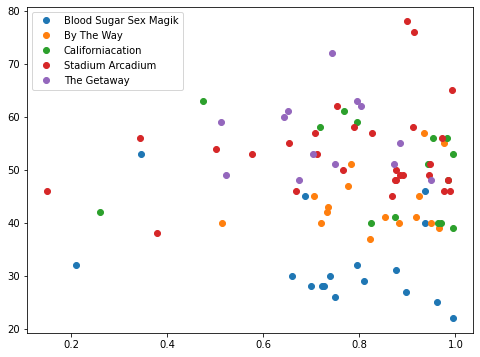

In [90]:
fix, ax = plt.subplots(figsize=(8,6))
for name, group in grouped:
    plt.plot(group["energy"], group["popularity"], marker="o", linestyle="", label=name)
    plt.legend()

In [5]:
album = genius.search_album("The Getaway", "Red Hot Chili Peppers")

Searching for "The Getaway" by Red Hot Chili Peppers...


In [6]:
album.save_lyrics()

Wrote Lyrics_TheGetaway.json.


In [23]:
album2 = genius.search_album("Californiacation", "Red Hot Chili Peppers")

Searching for "Californiacation" by Red Hot Chili Peppers...


In [24]:
album2.save_lyrics()

Wrote Lyrics_Californication.json.


In [265]:
with open('lyrics_data/Lyrics_TheGetaway.json') as f:
    data = json.load(f)

data['tracks'][0]['song']['lyrics']

"[Verse 1: Anthony Kiedis]\nThat's right, you're right, we will do our thing tonight alright\nTake me through the future\nIt's time, you're fine, just another color coded crime\nIncision and a suture\nYou told my friend we would get it on no matter when\nA supercavitation\nLet's go, you show me something no one will ever know\nA love hallucination\n\n[Chorus: Anthony Kiedis]\nAnother lonely superstar to getaway inside your car\nTake it much too far\nSurrender to the brave inside a lover that another tried\nTake it, too my ride\n\n[Post-Chorus: Anthony Kiedis & Anna Waronker]\nYou don't have to keep it if it's mine\nAnother lonely superstar to getaway inside your car\nAnother place maybe another time\nSurrender to the brave inside a lover that another tried\n\n[Verse 2: Anthony Kiedis]\nComplete repeat sittin' in your car and on your street\nLost in California\nLet's steal this wheel, take a spin to find out how we feel\nJust around the corner\nSlow down for sound, turn it up and no we 

In [266]:
data['tracks'][0]['song']['title']

'The Getaway'

In [267]:
col = rhcp.get(rhcp['track'] == data['tracks'][0]['song']['title']).index
rhcp.loc[col]['lyrics'] = data['tracks'][0]['song']['lyrics']

In [268]:
rhcp

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album
index,,,,,,,,,,,,,,,,,
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.079900,0.000012,0.3710,0.6670,113.999,60,The Getaway
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.072200,0.019900,0.1100,0.1970,91.959,72,The Getaway
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.116000,0.147000,0.1520,0.8420,164.038,51,The Getaway
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.319000,0.000129,0.1190,0.3390,148.158,59,The Getaway
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.104000,0.000066,0.1500,0.5770,171.597,62,The Getaway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,spotify:track:523HruoIx6BPW8JhZ6La3o,Apache Rose Peacock,282133,False,13,0.712,0.723,9,-10.141,0.0578,0.003080,0.000006,0.0664,0.8570,91.880,28,Blood Sugar Sex Magik
86,spotify:track:7G3d1rttNC54yaHiQfEO7p,The Greeting Song,193506,False,14,0.459,0.962,2,-10.653,0.0485,0.002180,0.050300,0.1880,0.3070,134.139,26,Blood Sugar Sex Magik
87,spotify:track:6AojtE1obBPnKl9kV3wput,My Lovely Man,279066,False,15,0.602,0.750,11,-10.877,0.0483,0.000091,0.001480,0.2800,0.7380,113.917,26,Blood Sugar Sex Magik


In [269]:
len(data['tracks'])

13

In [270]:
lyric_df = pd.DataFrame(columns=['track','lyrics','cleaned_lyrics'])
lyric_df

,track,lyrics,cleaned_lyrics


In [271]:
def lyrics_to_df(data, df):
    for i in range(len(data['tracks'])):
        title = data['tracks'][i]['song']['title']
        lyric = data['tracks'][i]['song']['lyrics']
        df = df.append({'track': title, 'lyrics': lyric}, ignore_index=True)
    return df

In [272]:
lyric_df = lyrics_to_df(data, lyric_df)

In [273]:
lyric_df

,track,lyrics,cleaned_lyrics
0,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,[Verse 1]\nSuicide a month before I met you\nD...,NaN
5,Sick Love,[Verse 1]\nSay goodbye to Oz and everything yo...,NaN
6,Go Robot,[Verse 1]\nI called the teacher cause I wanted...,NaN
7,Feasting on the Flowers,[Verse 1]\nI was walking through the streets I...,NaN
8,Detroit,[Verse 1]\nFind me in the suburbs and the shad...,NaN
9,This Ticonderoga,[Verse 1]\nI met a man in a rock 'n' roll band...,NaN


In [274]:
with open('lyrics_data/Lyrics_Californication.json') as f:
    data = json.load(f)
lyric_df = lyrics_to_df(data, lyric_df)
lyric_df

,track,lyrics,cleaned_lyrics
0,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,[Verse 1]\nSuicide a month before I met you\nD...,NaN
5,Sick Love,[Verse 1]\nSay goodbye to Oz and everything yo...,NaN
6,Go Robot,[Verse 1]\nI called the teacher cause I wanted...,NaN
7,Feasting on the Flowers,[Verse 1]\nI was walking through the streets I...,NaN
8,Detroit,[Verse 1]\nFind me in the suburbs and the shad...,NaN
9,This Ticonderoga,[Verse 1]\nI met a man in a rock 'n' roll band...,NaN


In [275]:
with open('lyrics_data/Lyrics_StadiumArcadium.json') as f:
    data = json.load(f)
lyric_df = lyrics_to_df(data, lyric_df)
lyric_df

,track,lyrics,cleaned_lyrics
0,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,[Verse 1]\nSuicide a month before I met you\nD...,NaN
5,Sick Love,[Verse 1]\nSay goodbye to Oz and everything yo...,NaN
6,Go Robot,[Verse 1]\nI called the teacher cause I wanted...,NaN
7,Feasting on the Flowers,[Verse 1]\nI was walking through the streets I...,NaN
8,Detroit,[Verse 1]\nFind me in the suburbs and the shad...,NaN
9,This Ticonderoga,[Verse 1]\nI met a man in a rock 'n' roll band...,NaN


In [276]:
with open('lyrics_data/Lyrics_BytheWay.json') as f:
    data = json.load(f)
lyric_df = lyrics_to_df(data, lyric_df)
lyric_df

,track,lyrics,cleaned_lyrics
0,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,[Verse 1]\nSuicide a month before I met you\nD...,NaN
...,...,...,...
67,Tear,"[Verse 1]\nThis is my time, this is my tear\nI...",NaN
68,On Mercury,[Verse 1]\nI've got myself in a masochistic ho...,NaN
69,Minor Thing,[Verse 1]\nI change the key from C to D\nYou s...,NaN
70,Warm Tape,"[Verse 1]\nShiver for me, girl\nDeliver for me...",NaN


In [277]:
with open('lyrics_data/Lyrics_BloodSugarSexMagik.json') as f:
    data = json.load(f)
lyric_df = lyrics_to_df(data, lyric_df)
lyric_df

,track,lyrics,cleaned_lyrics
0,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",NaN
1,Dark Necessities,"[Verse 1]\nComin' on to the light of day, we g...",NaN
2,We Turn Red,[Intro]\nWe got large and we got small\nWe got...,NaN
3,The Longest Wave,[Verse 1]\nThrow me all around like a boomeran...,NaN
4,Goodbye Angels,[Verse 1]\nSuicide a month before I met you\nD...,NaN
...,...,...,...
84,Apache Rose Peacock,[Verse 1]\nSittin' on a sack of beans\nSittin'...,NaN
85,The Greeting Song,"[Verse 1]\nDrivin' around, I've got my baby an...",NaN
86,My Lovely Man,[Verse 1]\nI used to shout across the room to ...,NaN
87,Sir Psycho Sexy,"[Verse 1]\nA long, long, long, long time ago\n...",NaN


In [278]:
edit = lyric_df['lyrics'][0]
edit

"[Verse 1: Anthony Kiedis]\nThat's right, you're right, we will do our thing tonight alright\nTake me through the future\nIt's time, you're fine, just another color coded crime\nIncision and a suture\nYou told my friend we would get it on no matter when\nA supercavitation\nLet's go, you show me something no one will ever know\nA love hallucination\n\n[Chorus: Anthony Kiedis]\nAnother lonely superstar to getaway inside your car\nTake it much too far\nSurrender to the brave inside a lover that another tried\nTake it, too my ride\n\n[Post-Chorus: Anthony Kiedis & Anna Waronker]\nYou don't have to keep it if it's mine\nAnother lonely superstar to getaway inside your car\nAnother place maybe another time\nSurrender to the brave inside a lover that another tried\n\n[Verse 2: Anthony Kiedis]\nComplete repeat sittin' in your car and on your street\nLost in California\nLet's steal this wheel, take a spin to find out how we feel\nJust around the corner\nSlow down for sound, turn it up and no we 

In [279]:
edit = edit.replace('EmbedShare URLCopyEmbedCopy', ' ').replace(',', ' ')
edit

"[Verse 1: Anthony Kiedis]\nThat's right  you're right  we will do our thing tonight alright\nTake me through the future\nIt's time  you're fine  just another color coded crime\nIncision and a suture\nYou told my friend we would get it on no matter when\nA supercavitation\nLet's go  you show me something no one will ever know\nA love hallucination\n\n[Chorus: Anthony Kiedis]\nAnother lonely superstar to getaway inside your car\nTake it much too far\nSurrender to the brave inside a lover that another tried\nTake it  too my ride\n\n[Post-Chorus: Anthony Kiedis & Anna Waronker]\nYou don't have to keep it if it's mine\nAnother lonely superstar to getaway inside your car\nAnother place maybe another time\nSurrender to the brave inside a lover that another tried\n\n[Verse 2: Anthony Kiedis]\nComplete repeat sittin' in your car and on your street\nLost in California\nLet's steal this wheel  take a spin to find out how we feel\nJust around the corner\nSlow down for sound  turn it up and no we 

In [280]:
edit = re.sub(r'[\(\[].*?[\)\]]', '', edit)
edit = os.linesep.join([s for s in edit.splitlines() if s]) 

In [281]:
edit = edit.lower().split('\n')

In [282]:
edit

["that's right  you're right  we will do our thing tonight alright",
 'take me through the future',
 "it's time  you're fine  just another color coded crime",
 'incision and a suture',
 'you told my friend we would get it on no matter when',
 'a supercavitation',
 "let's go  you show me something no one will ever know",
 'a love hallucination',
 'another lonely superstar to getaway inside your car',
 'take it much too far',
 'surrender to the brave inside a lover that another tried',
 'take it  too my ride',
 "you don't have to keep it if it's mine",
 'another lonely superstar to getaway inside your car',
 'another place maybe another time',
 'surrender to the brave inside a lover that another tried',
 "complete repeat sittin' in your car and on your street",
 'lost in california',
 "let's steal this wheel  take a spin to find out how we feel",
 'just around the corner',
 'slow down for sound  turn it up and no we can’t be found',
 'the body that we transcend',
 'asleep  you weep  find

In [283]:
for i in range(len(lyric_df['lyrics'])):
    x = lyric_df['lyrics'][i]
    x = x.replace('EmbedShare URLCopyEmbedCopy', ' ').replace(',',' ')
    x = re.sub(r'[\(\[].*?[\)\]]', '', x)
    x = os.linesep.join([s for s in x.splitlines() if s])
    x = x.lower().split('\n')
    lyric_df['cleaned_lyrics'][i] = x

In [284]:
lyric_df

,track,lyrics,cleaned_lyrics
0,The Getaway,"[Verse 1: Anthony Kiedis]\nThat's right, you'r...",[that's right you're right we will do our th...
1,Dark Necessities,"[Verse 1]\nComin' on to the light of day, we g...","[comin' on to the light of day we got, many m..."
2,We Turn Red,[Intro]\nWe got large and we got small\nWe got...,"[we got large and we got small, we got a swimm..."
3,The Longest Wave,[Verse 1]\nThrow me all around like a boomeran...,"[throw me all around like a boomerang sky, wha..."
4,Goodbye Angels,[Verse 1]\nSuicide a month before I met you\nD...,"[suicide a month before i met you, deep regret..."
...,...,...,...
84,Apache Rose Peacock,[Verse 1]\nSittin' on a sack of beans\nSittin'...,"[sittin' on a sack of beans, sittin' down in n..."
85,The Greeting Song,"[Verse 1]\nDrivin' around, I've got my baby an...",[drivin' around i've got my baby and my top d...
86,My Lovely Man,[Verse 1]\nI used to shout across the room to ...,"[i used to shout across the room to you, and y..."
87,Sir Psycho Sexy,"[Verse 1]\nA long, long, long, long time ago\n...","[a long long long long time ago, before the..."


In [287]:
lyric_df['lyrics'][3]

"[Verse 1]\nThrow me all around like a boomerang sky\nWhatever you do, don't tell me why\nPoppies grow tall then say bye bye\nThe wave is here\nA seamless little team and then we tanked\nI guess we're not so sacrosanct\nThe tip of my tongue but then we blanked\nThe wave is here\nWaiting on the wind to tell my side\nReady set jet but she never gets far\nListen to your skin from the seat of my car\nTwo centipedes stuck in one glass jar\nThe longest wave\nWaiting on the wind to tell my side\n\n[Pre-Chorus]\nWhatcha want?\nWhatcha need?\nDo you love?\n\n[Chorus]\nMaybe I'm the right one, maybe I'm the wrong\nJust another play, the pirate, and the Papillon\nTime to call it a day\nMaybe you're my last love, maybe you're my first\nJust another way to play inside the universe\nNow I know why we came\n[Verse 2]\nSterile as the barrel of an old 12 gauge\nUnder my skin and half my age\nHotter than the wax on a saxifrage\nThe longest wave\nWaiting on the wind to turn my page\nSteady your sails for

In [288]:
lyric_df['cleaned_lyrics'][3]

['throw me all around like a boomerang sky',
 "whatever you do  don't tell me why",
 'poppies grow tall then say bye bye',
 'the wave is here',
 'a seamless little team and then we tanked',
 "i guess we're not so sacrosanct",
 'the tip of my tongue but then we blanked',
 'the wave is here',
 'waiting on the wind to tell my side',
 'ready set jet but she never gets far',
 'listen to your skin from the seat of my car',
 'two centipedes stuck in one glass jar',
 'the longest wave',
 'waiting on the wind to tell my side',
 'whatcha want?',
 'whatcha need?',
 'do you love?',
 "maybe i'm the right one  maybe i'm the wrong",
 'just another play  the pirate  and the papillon',
 'time to call it a day',
 "maybe you're my last love  maybe you're my first",
 'just another way to play inside the universe',
 'now i know why we came',
 'sterile as the barrel of an old 12 gauge',
 'under my skin and half my age',
 'hotter than the wax on a saxifrage',
 'the longest wave',
 'waiting on the wind to tur

In [289]:
lyric_df.drop(columns=['lyrics'], inplace=True)
lyric_df.head()

,track,cleaned_lyrics
0,The Getaway,[that's right you're right we will do our th...
1,Dark Necessities,"[comin' on to the light of day we got, many m..."
2,We Turn Red,"[we got large and we got small, we got a swimm..."
3,The Longest Wave,"[throw me all around like a boomerang sky, wha..."
4,Goodbye Angels,"[suicide a month before i met you, deep regret..."


In [290]:
rhcp = pd.merge(rhcp, lyric_df, on=['track'])
rhcp.head()

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,album,cleaned_lyrics
0,spotify:track:3bIQIx7hveYPQDdhjZ1kcq,The Getaway,250386,False,1,0.797,0.642,0,-8.082,0.0725,0.0799,0.000012,0.371,0.667,113.999,60,The Getaway,[that's right you're right we will do our th...
1,spotify:track:2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,302000,False,2,0.700,0.742,5,-6.777,0.0716,0.0722,0.019900,0.110,0.197,91.959,72,The Getaway,"[comin' on to the light of day we got, many m..."
2,spotify:track:0cv2LgkvEoQiGgFWcZaAMA,We Turn Red,200466,False,3,0.610,0.872,2,-5.428,0.0422,0.1160,0.147000,0.152,0.842,164.038,51,The Getaway,"[we got large and we got small, we got a swimm..."
3,spotify:track:0pjCkLjbgSLn5c0Ilwuv8z,The Longest Wave,211520,False,4,0.476,0.511,8,-6.250,0.0324,0.3190,0.000129,0.119,0.339,148.158,59,The Getaway,"[throw me all around like a boomerang sky, wha..."
4,spotify:track:2XTkpF9T2PKvcLgamGJGx1,Goodbye Angels,268733,False,5,0.365,0.804,9,-5.922,0.1050,0.1040,0.000066,0.150,0.577,171.597,62,The Getaway,"[suicide a month before i met you, deep regret..."


In [291]:
from nltk import word_tokenize

In [294]:
token = word_tokenize(rhcp['cleaned_lyrics'][0])
token

TypeError: expected string or bytes-like object